## Principal Components Analysis

Dimensions are a crucial topic in data science. The dimensions are all the features of the dataset. For instance, if you are looking at a dataset containing pieces of music, dimensions could be the genre, the length of the piece, the number of instruments, the presence of a singer, etc. You can imagine all these dimensions as different columns. 

When there are only two dimensions, it is very convenient to plot: you can use the x- and y-axis. Add color and you can represent a third dimension. It is similar if you have tens or hundereds of dimensions, it will just be harder to visualize it.

When you have that many dimensions, it happens that some of them are correlated. For instance, we can reasonably think that the genre of a piece of music will correlate with the instruments present in the piece. One way to reduce dimensionality is simply to keep only some of them. The problem is that you loose good information. It would be nice to have a way to reduce these dimensions while keeping important informations present in the dataset.

The aim of Principal Components Analysis (PCA) is generaly to reduce the number of dimensions of a dataset. PCA provides us with a new set of dimensions, the Principal Components (PC). They are ordered: the first PC is the dimension associated with the largest variance. In addition, PC’s are orthogonal. This means that each PC is decorelated to the preceding one. You can choose to keep only the first few PC’s, knowing that each PC is a linear combination of the data features. For instance, one PC could be a linear combination of the length of the muscial piece and the number of instruments playing.

## Describing the problem
The problem can be expressed as finding a function that converts a set of data points from ℝn to ℝl: we want to change the number of dimensions of our dataset from n to l. If l<n, the new dataset will be compressed because its number of features decreased. 

## Principal components analysis (PCA)
Principal components analysis as a change of coordinate system

The first step is to understand the shape of the data. $x^{(i)}$ is one data point containing $n$ dimensions. 
Let’s have $m$ data points organized as column vectors:

$$x=\left[x^{(1)}x^{(2)}\cdots x^{(m)}\right]$$

If we deploy the $n$ dimensions of our data points we will have:

$$
x=\begin{bmatrix}
x^{(1)}_1 &x^{(2)}_1&\cdots &x^{(m)}_1 \\
x^{(1)}_2 &x^{(2)}_2&\cdots &x^{(m)}_2 \\
\cdots &\cdots &\cdots &\cdots \\
x^{(1)}_n &x^{(2)}_n&\cdots &x^{(m)}_n 
\end{bmatrix}$$

### Adding some constraints: the decoding function
The encoding function $f(x)$ transforms $x$ into a smaller dimension $c$ and the decoding function transforms back $c$ into an approximation of $x$. To keep things simple, PCA will respect some constraints:

Constraint 1.
The decoding function has to be a simple matrix multiplication:

$$g(c)=[D]c$$

By applying the matrix $[D]$ to the dataset from the new coordinates system we should get back to the initial coordinate system.

Constraint 2.
The columns of $[D]$ must be orthogonal.

Constraint 3.
The columns of $[D]$ must have unit norm.

### Principal components analysis (PCA) - the decoding function

### Eigendecomposition
We will see that we can find the maximum of the function by calculating the eigenvectors of XTX.

Covariance matrix
As we wrote above, the optimization problem of maximizing the variance of the components and minimizing the error between the reconstructed and the actual data are equivalent. Actually, if you look at the formula of d you can see that there is the term XTX in the middle.

If we have centered our data around 0 (see bellow for more details about centering), XTX is the covariance matrix (see this Quora question).

The covariance matrix is a n by n matrix (n being the number of dimensions). Its diagonal is the variance of the corresponding dimensions and the other cells are the covariance between the two corresponding dimensions (the amount of redundancy).

This means that the largest covariance we have between two dimensions the more redundancy exists between these dimensions. This also means that the best-fit line is associated with small errors if the variance is high. To maximize the variance and minimize the covariance (in order to decorrelate the dimensions) means that the ideal covariance matrix is a diagonal matrix (non-zero values in the diagonal only). Therefore the diagonalization of the covariance matrix will give us the optimal solution.

Example 2.
As an example we will create again a 2D data set (like in 2.9). To see the effect of the PCA we will introduce some correlations between the two dimensions. Let’s create 100 data points with 2 dimensions:

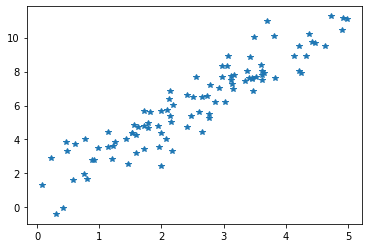

In [3]:
import numpy as np
from matplotlib import pyplot as plt

np.random.seed(123)
x = 5*np.random.rand(100)
y = 2*x + 1 + np.random.randn(100)

x = x.reshape(100, 1)
y = y.reshape(100, 1)

X = np.hstack([x, y])
X.shape

plt.plot(X[:,0], X[:,1], '*')
plt.show()

Highly correlated data means that the dimensions are redundant. It is possible to predict one from the other without losing much information.

The first processing we will do is to center the data around 0. PCA is a regression model without intercept (see here) and the first component is thus necessarly crossing the origin.

Here is a simple function that substract the mean of each column to each data point of this column. It can be used to center the data points around 0.

In [4]:
def centerData(X):
    X = X.copy()
    X -= np.mean(X, axis = 0)
    return X

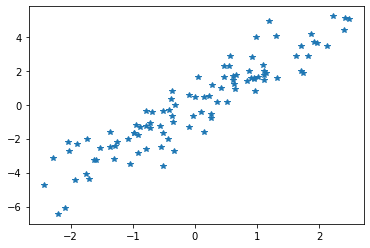

In [5]:
X_centered = centerData(X)
plt.plot(X_centered[:,0], X_centered[:,1], '*')
plt.show()

We can now look for PCs. We saw that they correspond to values taken by $d$ that maximize the following function:

d∗=argmaxdTr(dTXTXd) subject to dTd=1
To find $d$ we can calculate the eigenvectors of $[X]^T[X]$ . So let’s do that:

In [6]:
eigVals, eigVecs = np.linalg.eig(X_centered.T.dot(X_centered))
eigVecs

array([[-0.91116273, -0.41204669],
       [ 0.41204669, -0.91116273]])

These are the vectors maximizing our function. Each column vector is associated with an eigenvalue. The vector associated with the larger eigenvalue tells us the direction associated with the larger variance in our data.

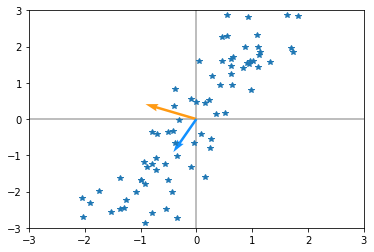

In [7]:
from finmarkets import plotVectors

orange = '#FF9A13'
blue = '#1190FF'
plotVectors(eigVecs.T, [orange, blue])
plt.plot(X_centered[:,0], X_centered[:,1], '*')
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.show()

We can see that the blue vector direction corresponds to the oblique shape of our data. The idea is that if you project the data points on the line corresponding to the blue vector direction you will end up with the largest variance. This vector has the direction that maximizes variance of projected data. 

In our figure above, the blue vector is the second eigenvector so let’s check that it is the one associated with the bigger eigenvalue:

In [8]:
eigVals

array([ 18.04730409, 798.35242844])

So yes, the second vector corresponds to the biggest eigenvalue.

Now that we have found the matrix $d$ we will use the encoding function to rotate the data. The goal of the rotation is to end up with a new coordinate system where data is uncorrelated and thus where the basis axes gather all the variance. It is then possible to keep only few axes: this is the purpose of dimensionality reduction.

$$c=[D]^Tx$$
$[D]$ is the matrix containing the eigenvectors that we have calculated before. In addition, this formula corresponds to only one data point where dimensions are the rows of $x$. In our case, we will apply it to all data points and since $X$ has dimensions on the columns we need to transpose it.

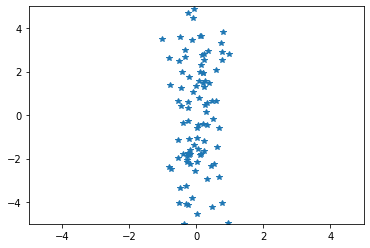

In [9]:
X_new = eigVecs.T.dot(X_centered.T)

plt.plot(eigVecs.T.dot(X_centered.T)[0, :], eigVecs.T.dot(X_centered.T)[1, :], '*')
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.show()

It worked! The rotation transformed our dataset that have now the more variance on one of the basis axis. You could keep only this dimension and have a fairly good representation of the data.

References
PCA
A lot of intuitive explanations on PCA

Principal Component Analysis

Linear algebra - ncsu

A one stop shop for PCA

PCA - Ben-Gurion University

Semi-orthogonal matrix
Wikipedia - Semi orthogonal matrix
Intuition about PCA
Blog George M Dallas
Derivatives
SE - Derivative of vector and vector transpose product
Link between variance maximized and error minimized:
SE - What norm of the reconstruction error is minimized by the low rank approximation

SE - PCA objective function

SE - Why do the leading eigenvectors of A maximize…

Centering data
Quora - Why do we need to center the data for PCA

SE - How does centering the data get rid of the intercept in regression and PCA

Unit norm constraint
SE - Why is the eigenvector in PCA taken to be unit norm